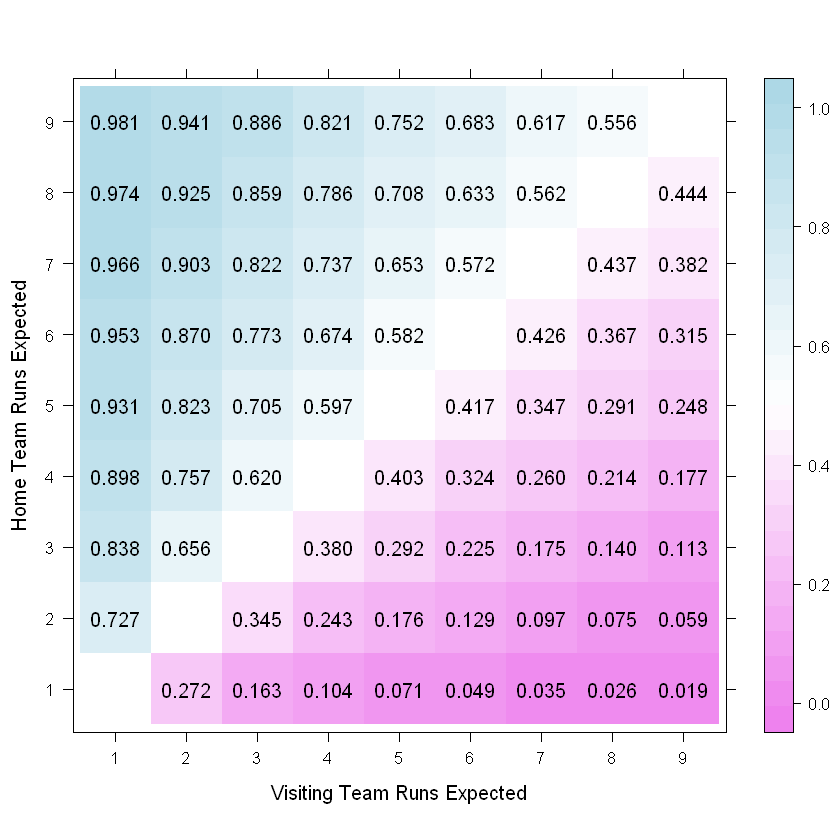

In [1]:
# Game-day Simulator for Baseball (R)
library(lattice)  # graphics package for probability matrix visual
simulator <- function(home_mean,away_mean,niterations) { 
     # input runs scored means, output probability of winning for home team
     set.seed(1234)  # set to obtain reproducible results 
     away_game_score <- numeric(niterations)
     home.game.score <- numeric(niterations)
     home_win <- numeric(niterations)
     i <- 1
     while (i < niterations + 1) { 
         away_game_score[i] <- rnbinom(1,mu=away_mean, size = 4)
         home.game.score[i] <- rnbinom(1,mu=home_mean, size = 4)
         if(away_game_score[i] > home.game.score[i]) home_win[i] <- 1
         if(away_game_score[i] > home.game.score[i] || 
         away_game_score[i] < home.game.score[i]) i <- i + 1 
         }
     n_home_win <- sum(home_win)
     n_home_win/niterations  # return probability of away team winning 
     } 

niterations <- 100000  # use smaller number for testing
# probability matrix for results... home team is rows, away team is columns
probmat <- matrix(data = NA, nrow = 9, ncol = 9,  
  dimnames = list(c(as.character(1:9)), c(as.character(1:9)))) 
for (index_home in 1:9)
for (index_away in 1:9)
if (index_home != index_away) {
     probmat[index_home,index_away] <- 
        simulator(index_home, index_away, niterations) 
     }
#pdf(file = "fig_sports_analytics_prob_matrix.pdf", width = 8.5, height = 8.5)
x <- rep(1:nrow(probmat),times=ncol(probmat))
y <- NULL
for (i in 1:ncol(probmat)) y <- c(y,rep(i,times=nrow(probmat)))
probtext <- sprintf("%0.3f", as.numeric(probmat))  # fixed format 0.XXX
text_data_frame <- data.frame(x, y, probtext)
text_data_frame$probtext <- as.character(text_data_frame$probtext)
text_data_frame$probtext <- ifelse((text_data_frame$probtext == "NA"),
    NA,text_data_frame$probtext)  # define diagonal cells as missing
text_data_frame <- na.omit(text_data_frame)  # diagonal cells
print(levelplot(probmat, cuts = 25, tick.number = 9,
    col.regions=colorRampPalette(c("violet", "white", "light blue")),
    xlab = "Visiting Team Runs Expected", 
    ylab = "Home Team Runs Expected",
    panel = function(...) {
        panel.levelplot(...)  
        panel.text(text_data_frame$x, text_data_frame$y, 
        labels = text_data_frame$probtext)
        }))
#dev.off()        
# Suggestion for the student: Develop simulators for football or basketball.    


[1] 5.01359

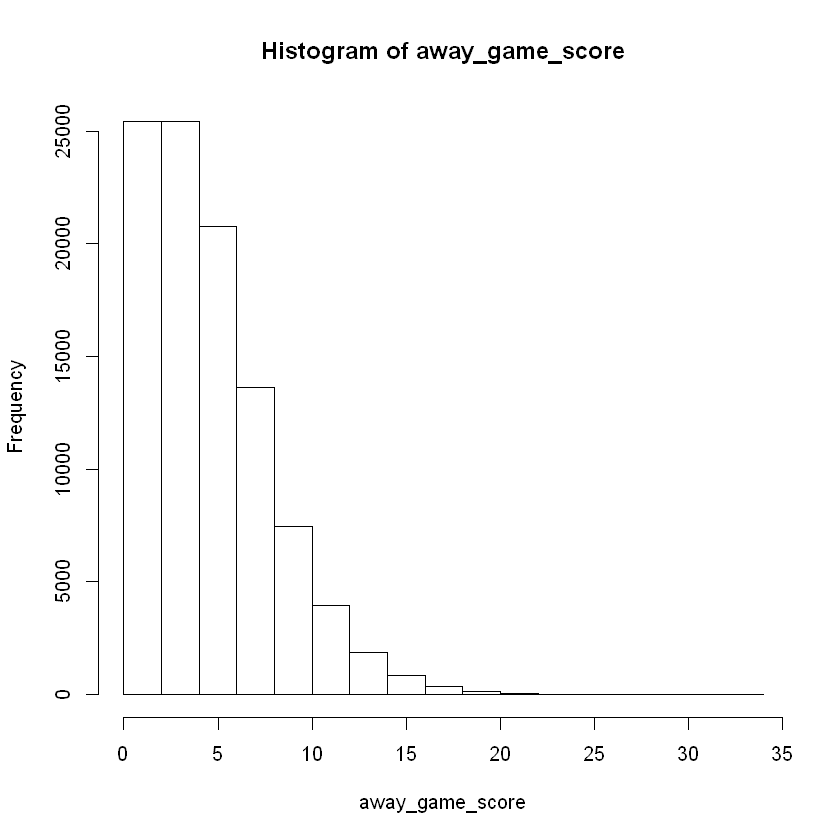

In [2]:
# DEVELOP Run Scored Distributions - Negative Binomial

niterations <- 100000  # use smaller number for testing

# input runs scored means, output probability of winning for home team
set.seed(1234)  # set to obtain reproducible results 
away_mean <- 4.97
home_mean <- 5.97
away_game_score <- numeric(niterations)
home.game.score <- numeric(niterations)
home_win <- numeric(niterations)
i <- 1
   while (i < niterations + 1) { 
       away_game_score[i] <- rnbinom(1,mu=away_mean, size = 4)
       home.game.score[i] <- rnbinom(1,mu=home_mean, size = 4)
       if(away_game_score[i] > home.game.score[i]) home_win[i] <- 1
       if(away_game_score[i] > home.game.score[i] || 
       away_game_score[i] < home.game.score[i]) i <- i + 1 
       }

mean(away_game_score)
hist(away_game_score)

[1] 4.95265

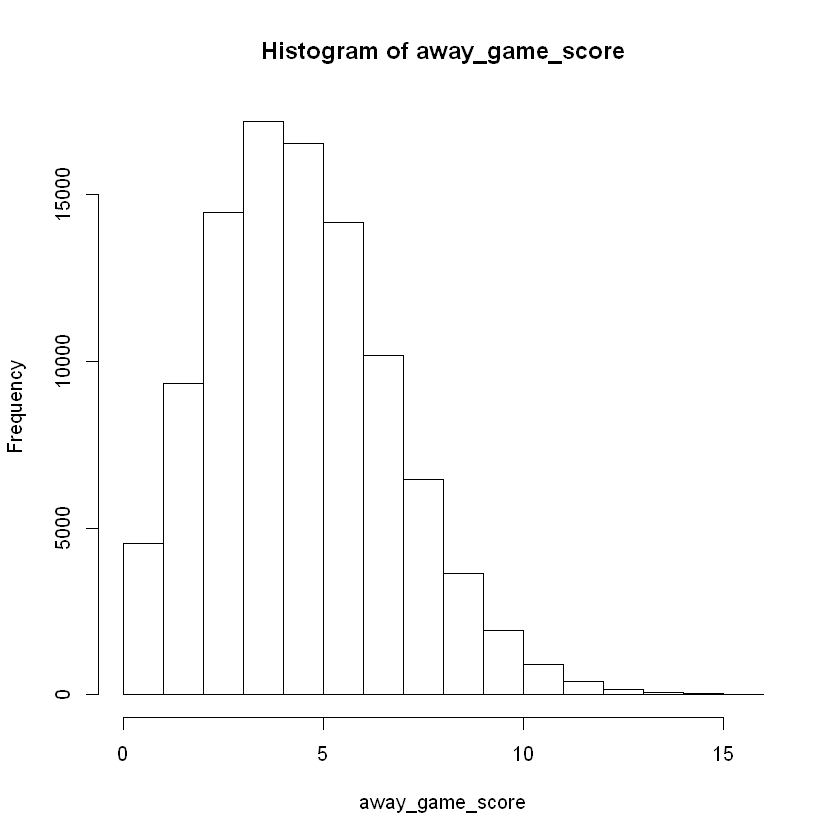

In [9]:
# DEVELOP Run Scored Distributions - Poisson

niterations <- 100000  # use smaller number for testing

# input runs scored means, output probability of winning for home team
set.seed(1234)  # set to obtain reproducible results 
away_mean <- 4.97
home_mean <- 5.97
away_game_score <- numeric(niterations)
home.game.score <- numeric(niterations)
home_win <- numeric(niterations)
i <- 1
   while (i < niterations + 1) { 
       away_game_score[i] <- rpois(1,away_mean)
       home.game.score[i] <- rpois(1,home_mean)
       if(away_game_score[i] > home.game.score[i]) home_win[i] <- 1
       if(away_game_score[i] > home.game.score[i] || 
       away_game_score[i] < home.game.score[i]) i <- i + 1 
       }

mean(away_game_score)
hist(away_game_score)